In [1]:
import os
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
print(ROOT)

/home/saisampathkedari/Bayesian-Filtering-and-Smoothing


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from filters.kalman_filter_utilities import *

## Set up a problem

Two dimensional system

\begin{equation}
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2
\end{bmatrix} 
= 
\begin{bmatrix}
0 & 1 \\
a & b 
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\end{equation}
where $a$ and $b$ are negative. This is a second order system, think of a mass-spring-damper where the $a$ and $b$ are functions of the spring and damping coefficients

We use a forward euler to approximate a continuous time system $\dot{x} = Ax$
\begin{equation}
x_{k+1} = x_{k} + \Delta t A x_k = (I + \Delta t A) x_k
\end{equation}

## Case 1: Full observations

Lets begin by first considering that we can observe every state
\begin{equation}
H = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\end{equation}

In [ ]:
# Define System
a = -0.5
b = -0.5
Atruth = np.array([[0, 1.0], [a, b]])
dt = 1e-1

Atruth = np.eye(2) + dt * Atruth         # Model A
H = np.eye(2)
measurement_noise_cov = 1e-2 * np.eye(H.shape[0])

system = TrueLinearSystem(A=Atruth, H=H, measurement_noise_cov=measurement_noise_cov)

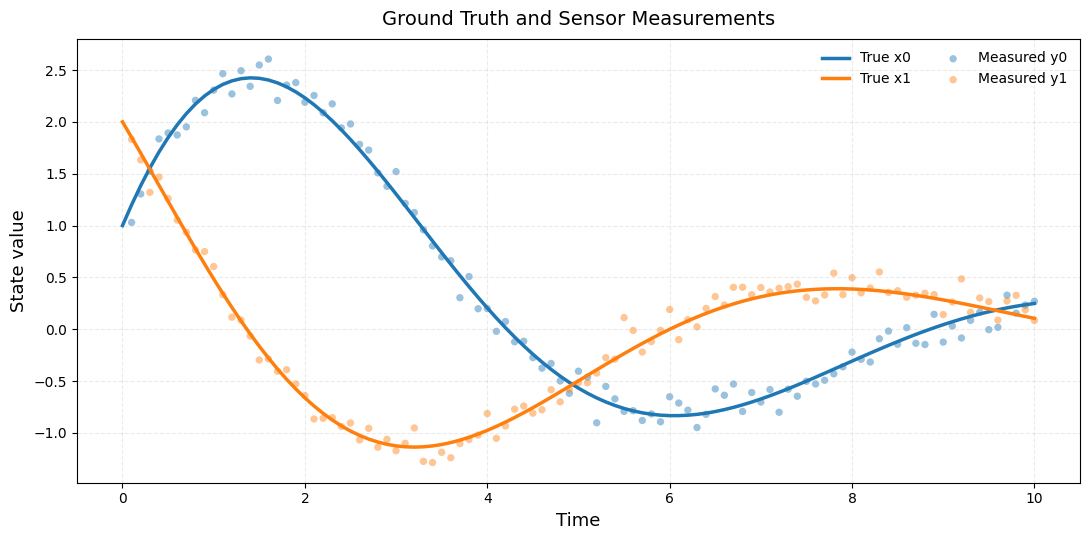

In [8]:
# ============================================================
# 0. Random number generator
# ============================================================
rng = np.random.default_rng(seed=None)  # non-deterministic runs


# ============================================================
# 1. Ground-truth system definition (reality)
# ============================================================
x0 = np.array([1.0, 2.0])  # true initial state

T = 10.0
Nsims = int(T / dt)
times = np.linspace(0.0, T, Nsims + 1)

# Observe at every step except t0
obs_ind = np.arange(1, times.shape[0])


# ============================================================
# 2. Generate ground truth and synthetic sensor data
# ============================================================
truth, measurements = generate_data(
    times=times,
    x0=x0,
    obs_ind=obs_ind,
    system=system,     # TrueLinearSystem
    rng=rng
)

plot_data_and_truth(
    truth,
    measurements,
    title="Ground Truth and Sensor Measurements"
)

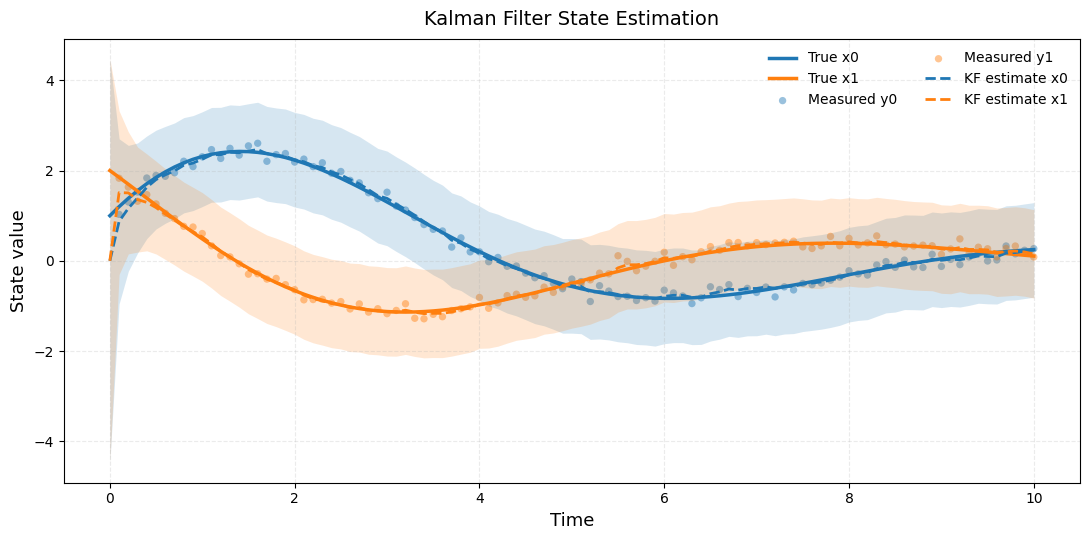

In [9]:
# ============================================================
# 3. Kalman filter design (estimator's belief)
# ============================================================
# Prior belief (intentionally uncertain)
X0 = Gaussian(
    mean=np.zeros(2),
    cov=5.0 * np.eye(2)
)

# Assumed dynamics model (can differ from truth)
Asim = np.array([[0, 1.0], [-0.5, -0.5]])
Asim = dt * Asim + np.eye(2)

Q = 1e-1 * np.eye(2)               # process noise (model uncertainty)
R = 1e0 * np.eye(H.shape[0])       # assumed measurement noise

kf_model = KalmanFilterModel(
    A=Asim,
    H=H,
    Q=Q,
    R=R
)


# ============================================================
# 4. Run Kalman filter and visualize estimation
# ============================================================
kf_history = run_kalman_filter(
    y_Observations=measurements,
    model=kf_model,
    X0=X0
)

plot_data_and_truth(
    truth,
    measurements,
    kf=kf_history,
    title="Kalman Filter State Estimation"
)

## Partial observation, only looking at measuring the first state

Lets look at what happens when we only measure 
\begin{equation}
H = \begin{bmatrix} 1 & 0 \end{bmatrix}
\end{equation}

In [26]:
H = np.array([[1,0]])
measurement_noise_cov = 1e-2 * np.eye(H.shape[0])

system = TrueLinearSystem(A=Atruth, H=H, measurement_noise_cov=measurement_noise_cov)

(100, 1)


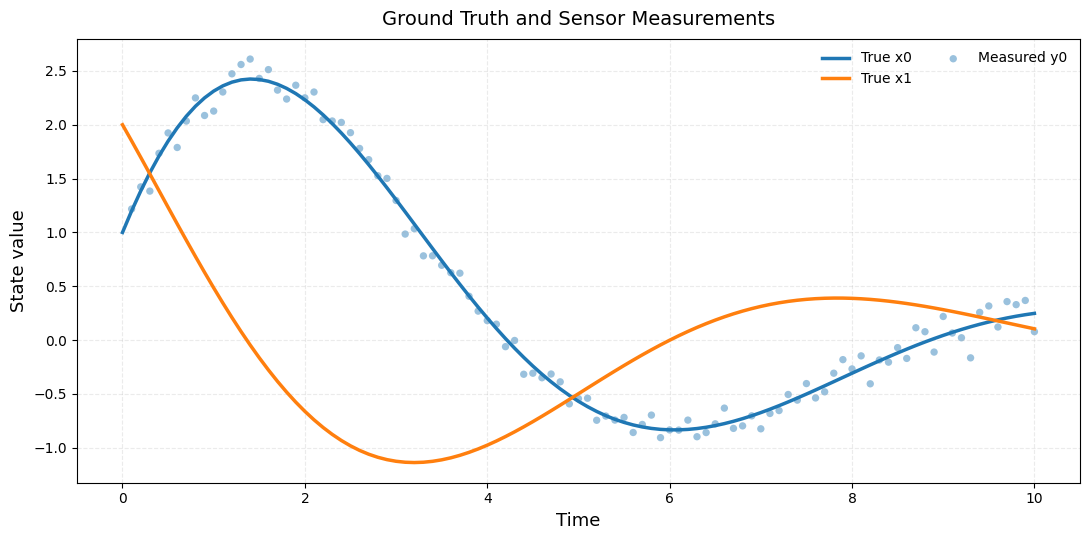

In [ ]:
# ============================================================
# 0. Random number generator
# ============================================================
rng = np.random.default_rng(seed=None)  # non-deterministic runs


# ============================================================
# 1. Ground-truth system definition (reality)
# ============================================================
x0 = np.array([1.0, 2.0])  # true initial state

T = 10.0
Nsims = int(T / dt)
times = np.linspace(0.0, T, Nsims + 1)

# Observe at every step except t0
obs_ind = np.arange(1, times.shape[0])


# ============================================================
# 2. Generate ground truth and synthetic sensor data
# ============================================================
truth, measurements = generate_data(
    times=times,
    x0=x0,
    obs_ind=obs_ind,
    system=system,     # TrueLinearSystem
    rng=rng
)

plot_data_and_truth(
    truth,
    measurements,
    title="Ground Truth and Sensor Measurements"
)

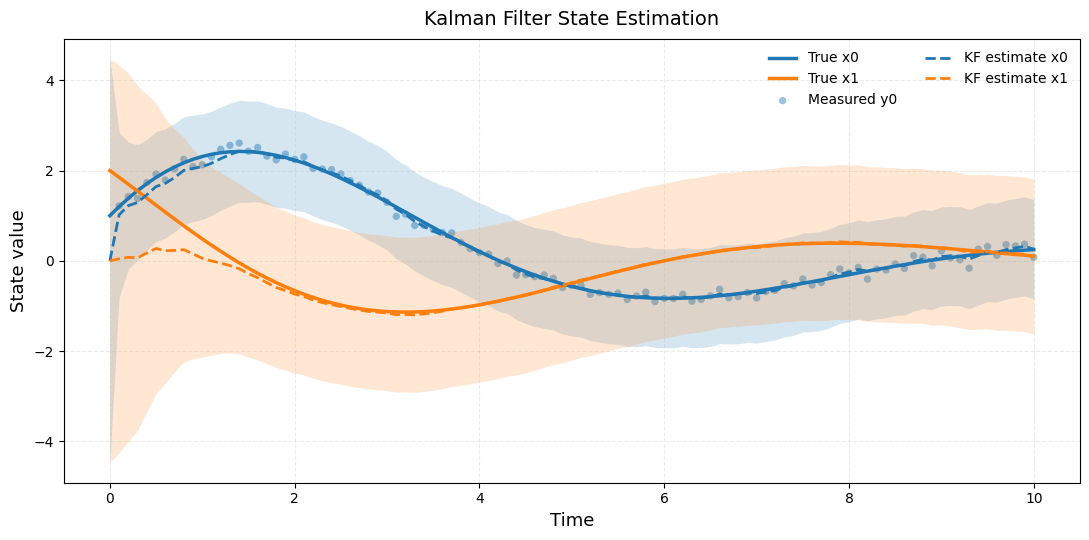

In [28]:
# ============================================================
# 3. Kalman filter design (estimator's belief)
# ============================================================
# Prior belief (intentionally uncertain)
X0 = Gaussian(
    mean=np.zeros(2),
    cov=5.0 * np.eye(2)
)

# Assumed dynamics model (can differ from truth)
Asim = np.array([[0, 1.0], [-0.5, -0.5]])
Asim = dt * Asim + np.eye(2)

Q = 1e-1 * np.eye(2)               # process noise (model uncertainty)
R = 1e0 * np.eye(H.shape[0])       # assumed measurement noise

kf_model = KalmanFilterModel(
    A=Asim,
    H=H,
    Q=Q,
    R=R
)


# ============================================================
# 4. Run Kalman filter and visualize estimation
# ============================================================
kf_history = run_kalman_filter(
    y_Observations=measurements,
    model=kf_model,
    X0=X0
)

plot_data_and_truth(
    truth,
    measurements,
    kf=kf_history,
    title="Kalman Filter State Estimation"
)